In [1]:
from rdkit import Chem

from rdkit.Chem import rdMolDescriptors

import math
import random
import numpy as np

## Example molecular property prediction: Solubility

The idea for this project is to use *known* molecular properties to predict *unknown* molecular properties. You can get data for this project anywhere you'd like, but we suggest using Therapudic Data Commons. They have a python package that you can interact with directly.

https://tdcommons.ai/overview/

To install tdc:

`pip install PyTDC`


`get_split` will split your data into training data and testing data for you!

In [2]:
from tdc.single_pred import ADME

data = ADME(name = 'Solubility_AqSolDB')
split = data.get_split()

Found local copy...
Loading...
Done!


## Take a look at the data

In [3]:
split['train']

,Drug_ID,Drug,Y
0,Benzo[cd]indol-2(1H)-one,O=C1Nc2cccc3cccc1c23,-3.254767
1,4-chlorobenzaldehyde,O=Cc1ccc(Cl)cc1,-2.177078
2,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,c1cc(N(CC2CO2)CC2CO2)ccc1Cc1ccc(N(CC2CO2)CC2CO...,-4.662065
3,vinyltoluene,C=Cc1cccc(C)c1,-3.123150
4,3-(3-ethylcyclopentyl)propanoic acid,CCC1CCC(CCC(=O)O)C1,-3.286116
...,...,...,...
6983,sarafloxacin,O=C(O)c1cn(-c2ccc(F)cc2)c2cc(N3CCNCC3)c(F)cc2c1=O,-3.130000
6984,sparfloxacin,C[C@H]1CN(c2c(F)c(N)c3c(=O)c(C(=O)O)cn(C4CC4)c...,-3.370000
6985,sulindac_form_II,CC1=C(CC(=O)O)c2cc(F)ccc2/C1=C/c1ccc(S(C)=O)cc1,-4.500000
6986,tetracaine,CCCCNc1ccc(C(=O)OCCN(C)C)cc1,-3.010000


In [4]:
split['test']

,Drug_ID,Drug,Y
0,"2-ethyl-9,10-dihydroanthracene-9,10-dione",CCc1ccc2c(c1)C(=O)c1ccccc1C2=O,-5.984242
1,Digoxin,CC1OC(OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C(CCC6C5CC...,-4.160000
2,diphenic acid,O=C(O)c1ccccc1-c1ccccc1C(=O)O,-2.283900
3,pentachlorobutadiene,ClC(Cl)=CC(Cl)=C(Cl)Cl,-4.230000
4,trimethyl phosphate,COP(=O)(OC)OC,0.552600
...,...,...,...
1991,4-vinylpyridine,C=Cc1ccncc1,-0.557900
1992,"Benzoic acid, 2-hydroxy-5-[[4-[[4-[[8-hydroxy-...",COc1cc(N=Nc2cc(S(=O)(=O)[O-])cc3cc(S(=O)(=O)[O...,-2.483388
1993,"(2E)-1-(2,6,6-trimethylcyclohex-3-en-1-yl)but-...",C/C=C/C(=O)C1C(C)C=CCC1(C)C,-3.396367
1994,1-bromo-2-ethylbenzene,CCc1ccccc1Br,-3.670200


## How do we describe a molecule using data?

To train a machine learning model, we need a way to represent a molecule using data. SMILES itself doesn't contain a lot of information, so we can start by using molecular descriptors.

In [5]:
m = Chem.MolFromSmiles("CCc1ccc2c(c1)C(=O)c1ccccc1C2=O")
properties = rdMolDescriptors.Properties()
names = properties.GetPropertyNames()
values = properties.ComputeProperties(m)
for name, value in zip(names, values):
    print(f"{name}: {value}")

exactmw: 236.083729624
amw: 236.26999999999998
lipinskiHBA: 2.0
lipinskiHBD: 0.0
NumRotatableBonds: 1.0
NumHBD: 0.0
NumHBA: 2.0
NumHeavyAtoms: 18.0
NumAtoms: 30.0
NumHeteroatoms: 2.0
NumAmideBonds: 0.0
FractionCSP3: 0.125
NumRings: 3.0
NumAromaticRings: 2.0
NumAliphaticRings: 1.0
NumSaturatedRings: 0.0
NumHeterocycles: 0.0
NumAromaticHeterocycles: 0.0
NumSaturatedHeterocycles: 0.0
NumAliphaticHeterocycles: 0.0
NumSpiroAtoms: 0.0
NumBridgeheadAtoms: 0.0
NumAtomStereoCenters: 0.0
NumUnspecifiedAtomStereoCenters: 0.0
labuteASA: 105.26547882970576
tpsa: 34.14
CrippenClogP: 3.024400000000001
CrippenMR: 69.12700000000002
chi0v: 10.065055246441656
chi1v: 6.034292603145896
chi2v: 3.3977953144313253
chi3v: 3.3977953144313253
chi4v: 2.366473296421212
chi0n: 10.065055246441656
chi1n: 6.034292603145896
chi2n: 3.3977953144313253
chi3n: 3.3977953144313253
chi4n: 2.366473296421212
hallKierAlpha: -2.2199999999999998
kappa1: 10.904163472816741
kappa2: 3.913377321142427
kappa3: 1.4222677668352413
Phi: 2

In [6]:
def mol_to_vector(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    
    properties = rdMolDescriptors.Properties()
    # To consider: which properties are the most helpful in predicting your
    # desired properties?
    return list(properties.ComputeProperties(mol))

## Some data wrangling

In [7]:
y_training = []
x_training = []

for ind in split['train'].index:
    mol_vec = mol_to_vector(split['train']['Drug'][ind])
    if mol_vec is None:
        # issue reading smiles?
        continue
    x_training.append(mol_vec)
    y_training.append(split['train']['Y'][ind])

# Testing data
x_testing = []
test_target = []

for ind in split['test'].index:
    mol_vec = mol_to_vector(split['test']['Drug'][ind])
    if mol_vec is None:
        continue
    x_testing.append(mol_vec)
    test_target.append(split['test']['Y'][ind])

## Build model and run predictions

In [8]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

model = linear_model.BayesianRidge()
model.fit(x_training, y_training)

test_output = model.predict(x_testing)

print(f'Mean squared error (MSE): {mean_squared_error(test_target, test_output)}')
print(f'R^2: {r2_score(test_target, test_output)}')

Mean squared error (MSE): 3.0880690993561983
R^2: 0.4309477928028421


## Plot results

What else would be interesting to plot other than absolute error?

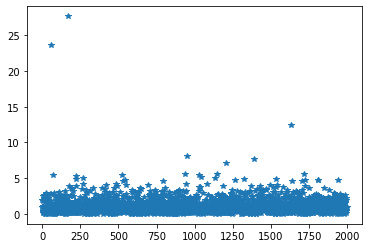

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

abs_error = abs(test_target - test_output)
plt.plot(abs_error, '*')
plt.show()

# For your project

* Try other datasets!
* What is the best model to use?
* What molecular descriptors are the best to use when prediciting certain properties?
    * You could look into other libraries that calculate molecular descriptors, such as https://github.com/samoturk/mol2vec
    * You could also use sklearn.feature_selection to determine the best descriptors to use in prediction
    * You could consider using fingerprints as the input to your model https://greglandrum.github.io/rdkit-blog/posts/2023-01-18-fingerprint-generator-tutorial.html
* How will this interact with the web app your team is building? What sort of information do you want to communicate with the front end, and what information to do want to communicate back?